In [1]:
#pip install nltk

In [2]:
#import nltk

In [3]:
#nltk.download_shell() #hitting 'l', allows you to see the available packages to download
                     #after downloading a package, hit 'q' to quit the shell
    
    

## Get the data

We'll be using a dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)!
The file we are using contains a collection of over 5000 SMS phone messages. You can check out the **readme** file for more info.

In [4]:
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

#rstrip() removes characters from the right based on the argument

In [5]:
len(messages)

5574

In [6]:
messages[0] #string of the first message        

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [8]:
for mess_no, message in enumerate(messages[:10]): #up to the first 10 messages
    print(mess_no,message)
    print('\n')     #leaves a space between each line

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [9]:
messages[0]      #\t indicates that there's a tab separation         #the file type is TSV (Tab-seperated values)

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
import pandas as pd

In [11]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])
#put the spam collection data, into a table               #corpus=collection of texts

In [12]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [13]:
messages.describe()

#2 unique labels:ham and spam
#there's less unique messages than the actual count, meaning there's repeated messages in there
#the most popular message is 'Sorry, I'll call you later', which occurs 30x

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
messages.groupby('label').describe()
#This gives me a direct comparison between the ham and spam labels
#feature engineering is a major part of spam collection ---> https://en.wikipedia.org/wiki/Feature_engineering
#The better your domain knowledge on the data, the better your ability to engineer more features from it.

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [15]:
messages['length']=messages['message'].apply(len) #add a length column to the table

In [16]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

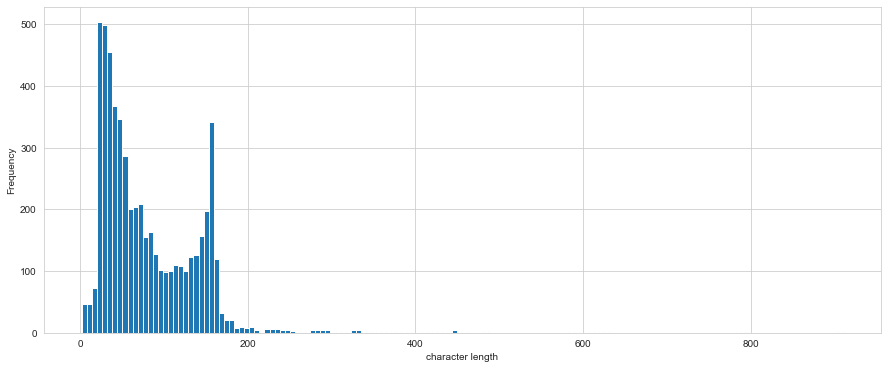

In [92]:
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
messages['length'].plot.hist(bins=150)

plt.xlabel('character length');

#this histogram appears to be bimodal    #text length has 2 peaks

#(character length includes spaces)

In [19]:
messages['length'].describe()
#5572 is the number of messages
#910 is the max length of characters in a message
#80.49 is the mean character length in messages

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [20]:
messages[messages['length']==910] #the message with the longest length is 'ham'

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [21]:
messages[messages['length']==910]['message'].iloc[0]

#find the message with the longest length     #['message'].iloc[0] prints the whole message


"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

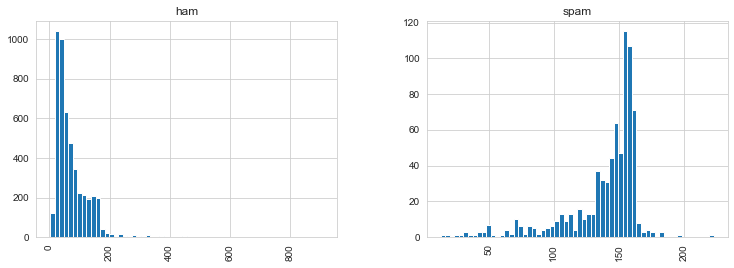

In [22]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4));

#Spam messages tend to have more characters
#ham messages are centred around 50 characters
#spam messages are centred around 150 characters

#message length appears to be a good feature to distinguish 'ham' from 'spam' messages

## Text pre-processing

<ul>
<li>Our main issue with our data is that it is all in text format (strings).</li> 
<li>Classification algorithms generally need some sort of <b>numerical feature vector</b> in order to perform the classification task.</li><li>Bag-of-words (bow) is the simplest way to convert a corpus to vectors ---> where each unique word in a text will be represented by one number</li></ul>

In [23]:
import string

In [24]:
mess = 'Sample message! Notice: it has punctuation.'

In [25]:
string.punctuation #string of all punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
nopunc=[c for c in mess if c not in string.punctuation]
#will list the elements in the 'message', without the punctuation marks

In [27]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [28]:
from nltk.corpus import stopwords

In [29]:
stopwords.words('english') #produces a list of all English 'stopwords' 

#stopwords:common words that don't tell you any particular features

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
nopunc=''.join(nopunc) #joins the sentence up into one line, instead of it being a list

In [31]:
nopunc

'Sample message Notice it has punctuation'

In [32]:
x=['a','b','c','d']

In [33]:
'_'.join(x)

'a_b_c_d'

In [34]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [35]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
#function to remove the stopwords

In [36]:
clean_mess #now we just have the important words (stopwords have been removed)

['Sample', 'message', 'Notice', 'punctuation']

In [37]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [38]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [39]:
#tokenize: convert text messages into a list of tokens (words that we actually want)
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Vectorization

<ul><li>Currently, we have the messages as lists of <b>tokens</b> (also known as <a href=http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html>lemmas</a>)</li>
<li>We need to convert each of those messages into a vectors that the SciKit Learn's algorithm models can work with.</li>

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model (<b>TF-IDF</b>):

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm) <br><br>

<ul><li>Each vector will have as many dimensions as there are unique words in the SMS corpus.</li><li>We will first use Sklearn's <b>CountVectorizer</b>.</li> <li>This model will convert a collection of text documents to a matrix of token counts.</li></ul><br><br>

<ul><li>We can imagine this as a 2-Dimensional matrix.<li>Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message.</li> 
    
For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).    


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message']) 
#creating a 2D matrix of word count against message   #this step does take a while   
#bow=bag of words

In [42]:
len(bow_transformer.vocabulary_) #the total number of words in our vocabulary

11425

In [43]:
mess4=messages['message'][3] #grabs the fourth message (which is at index 3)

In [44]:
print(mess4)

U dun say so early hor... U c already then say...


In [45]:
len(mess4)

49

In [46]:
bow4=bow_transformer.transform([mess4]) 
#transforms mess4 into a 'bag of words'

In [47]:
print(bow4) 
#there's 7 unique words in message 4
#2 of them appear twice

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [48]:
print(bow4.shape) #1 against the entire vocabulary (11425 words)

(1, 11425)


In [49]:
bow_transformer.get_feature_names()[4068] #locate one of the words that appears twice
                                          #word 4068='U'

'U'

In [50]:
bow_transformer.get_feature_names()[9554] #this is the other word that appears twice
                                          #word 9554='say'

'say'

In [51]:
messages_bow=bow_transformer.transform(messages['message'])
#use .transform on our bow transformed object to transform the entire DataFrame of messages
#Let's see how the bag-of-words counts for the entire SMS corpus is a large and sparse matrix

In [52]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
#5572 rows by 11425 columns
#messages_bow.shape[0]=5572
#messages_bow.shape[1]=11425

Shape of Sparse Matrix:  (5572, 11425)


In [53]:
print('Amount of Non-Zero occurences: ', messages_bow.nnz) 

Amount of Non-Zero occurences:  50548


In [54]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))
#compares non-zero messages to the total number of messages

sparsity: 0


In [55]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))
#the actual sparsity, without rounding the answer

sparsity: 0.07940295412668218


**TF-IDF**

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer

In [57]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
#fit the Tfidf transformer to my 'bag of words'

In [58]:
tfidf4 = tfidf_transformer.transform(bow4)
#apply the transformation to the bow for message 4

In [59]:
print(tfidf4)
#we now have a TF-IDF for the bow of message 4
#TF-IDF values for each of the 7 unique words in the message

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [60]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
#check the IDF for the words 'university' and 'u'

8.527076498901426
3.2800524267409408


In [61]:
messages_tfidf=tfidf_transformer.transform(messages_bow)
#creates the TF-IDF for all of the messages

In [62]:
print(messages_tfidf)
#TF-IDF of every word count vector

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

In [63]:
print(messages_tfidf.shape)
#5572 rows: 5572 words in the message
#11425 columns: total vocabulary

(5572, 11425)


## Train model

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])
#fit our messages to a Multinomial Naïve Bayes model
#This will train our spam/ham classifier

In [66]:
spam_detect_model.predict(tfidf4)[0] #ham or spam
#gives the label of the first 'tfidf4' result

'ham'

In [67]:
messages['label'][3] #grab the label of the 4th message

'ham'

In [68]:
messages['label'][5] #grab the label of the 6th message

'spam'

**Model Evaluation**

In [69]:
all_pred = spam_detect_model.predict(messages_tfidf)
#predict the labels of all of the 'tfidf' messages

In [70]:
all_pred
#However, to understand the true predictive power of our model
#we need to split the data in training and testing datasets

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

## Train-Test Split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], 
                                                                messages['label'], test_size=0.3)

In [73]:
print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

3900 1672 5572


In [74]:
len(msg_test)/(len(msg_train) + len(msg_test))
#test size is 30% of the entire dataset

0.30007178750897345

In [75]:
len(msg_train)/(len(msg_train) + len(msg_test)) #           test/train
#train size is 70% of the entire dataset    #default split is 30/70 

0.6999282124910265

## Creating a Data Pipeline

In [76]:
from sklearn.pipeline import Pipeline
#summarises everything that we've done into a pipeline, so we don't have to constantly repeat our sets of data
#this will allows us to set up all the transformations that we will do to the data for future use
#Sklearn's pipeline lets us store pipelines of workflow

In [77]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors with Naïve Bayes classifier
])

#Pipeline automates these 3 steps

In [78]:
pipeline.fit(msg_train,label_train);
#fits our training data to the pipeline model

In [79]:
predictions=pipeline.predict(msg_test)
#to predict the labels of our messages for testing

In [89]:
predictions

array(['ham', 'ham', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [80]:
from sklearn.metrics import classification_report

In [81]:
print(classification_report(predictions,label_test))
#Results of our Naïve Bayes classification --> the scores are high

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1521
        spam       0.68      1.00      0.81       151

    accuracy                           0.96      1672
   macro avg       0.84      0.98      0.89      1672
weighted avg       0.97      0.96      0.96      1672



**Try the Random Forest Classifier**

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
from sklearn.pipeline import Pipeline

In [84]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors with RandomForest classifier
])

In [85]:
pipeline.fit(msg_train,label_train);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [86]:
predictions_rf = pipeline.predict(msg_test)

In [88]:
print(classification_report(predictions_rf,label_test))
#results for the random forest classifier are very similar
#with some small differences

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1510
        spam       0.73      0.99      0.84       162

    accuracy                           0.96      1672
   macro avg       0.86      0.98      0.91      1672
weighted avg       0.97      0.96      0.97      1672



## Resources

[NLTK Book Online](http://www.nltk.org/book/)

[Kaggle Walkthrough](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words)

[SciKit Learn's Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

[Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)